In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
X, y = load('../../preprocess/clustering_data.joblib')

In [3]:
scaler = MinMaxScaler()
X.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,NumTotalPurchases,Customer_For
0,0.0,0.503625,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.35,0.696429,0.639683,0.0,0.000000,0.00,0.0,0.581395,0.913452
1,0.0,0.398325,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.25,0.750000,0.008730,0.0,0.666667,0.50,1.0,0.139535,0.117592
2,0.0,0.623933,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.20,0.553571,0.305952,1.0,0.000000,0.25,0.0,0.488372,0.444026
3,0.0,0.222456,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.30,0.214286,0.019048,1.0,0.333333,0.50,1.0,0.186047,0.061148
4,0.5,0.505009,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.25,0.267857,0.165476,1.0,0.333333,0.50,1.0,0.441860,0.301976


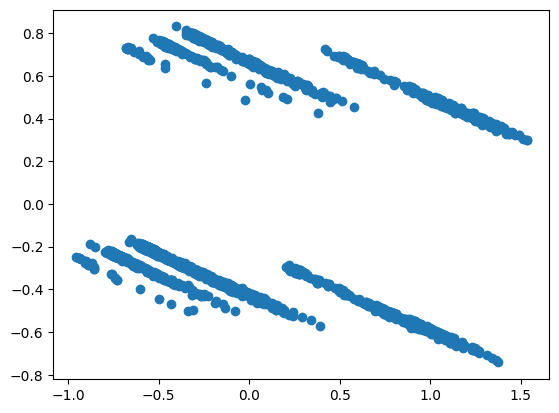

In [4]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1])

pca_names = [f'Component {i}' for i in range(pca.n_components_)]

In [5]:
covariances = ['full', 'tied', 'diag', 'spherical']
silhouettes_cov = []

for covariance in covariances:
    gauss = GaussianMixture(n_components=2, covariance_type=covariance, random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    silhouettes_cov.append(silhouette_score(X, labels))

Text(0, 0.5, 'Silhouette score')

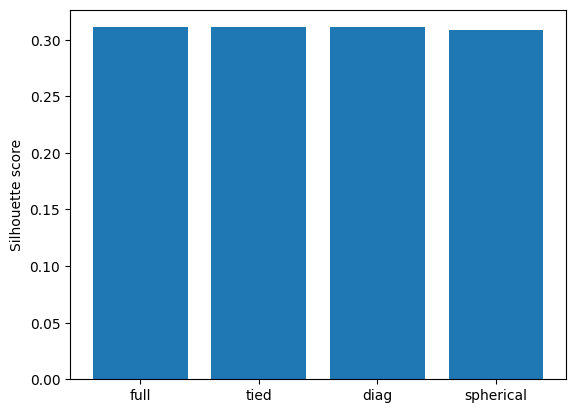

In [6]:
plt.bar(covariances, silhouettes_cov)
plt.ylabel('Silhouette score')

In [7]:
silhouettes_cov

[0.31097629894827766,
 0.31097629894827766,
 0.31097629894827766,
 0.3086597212855029]

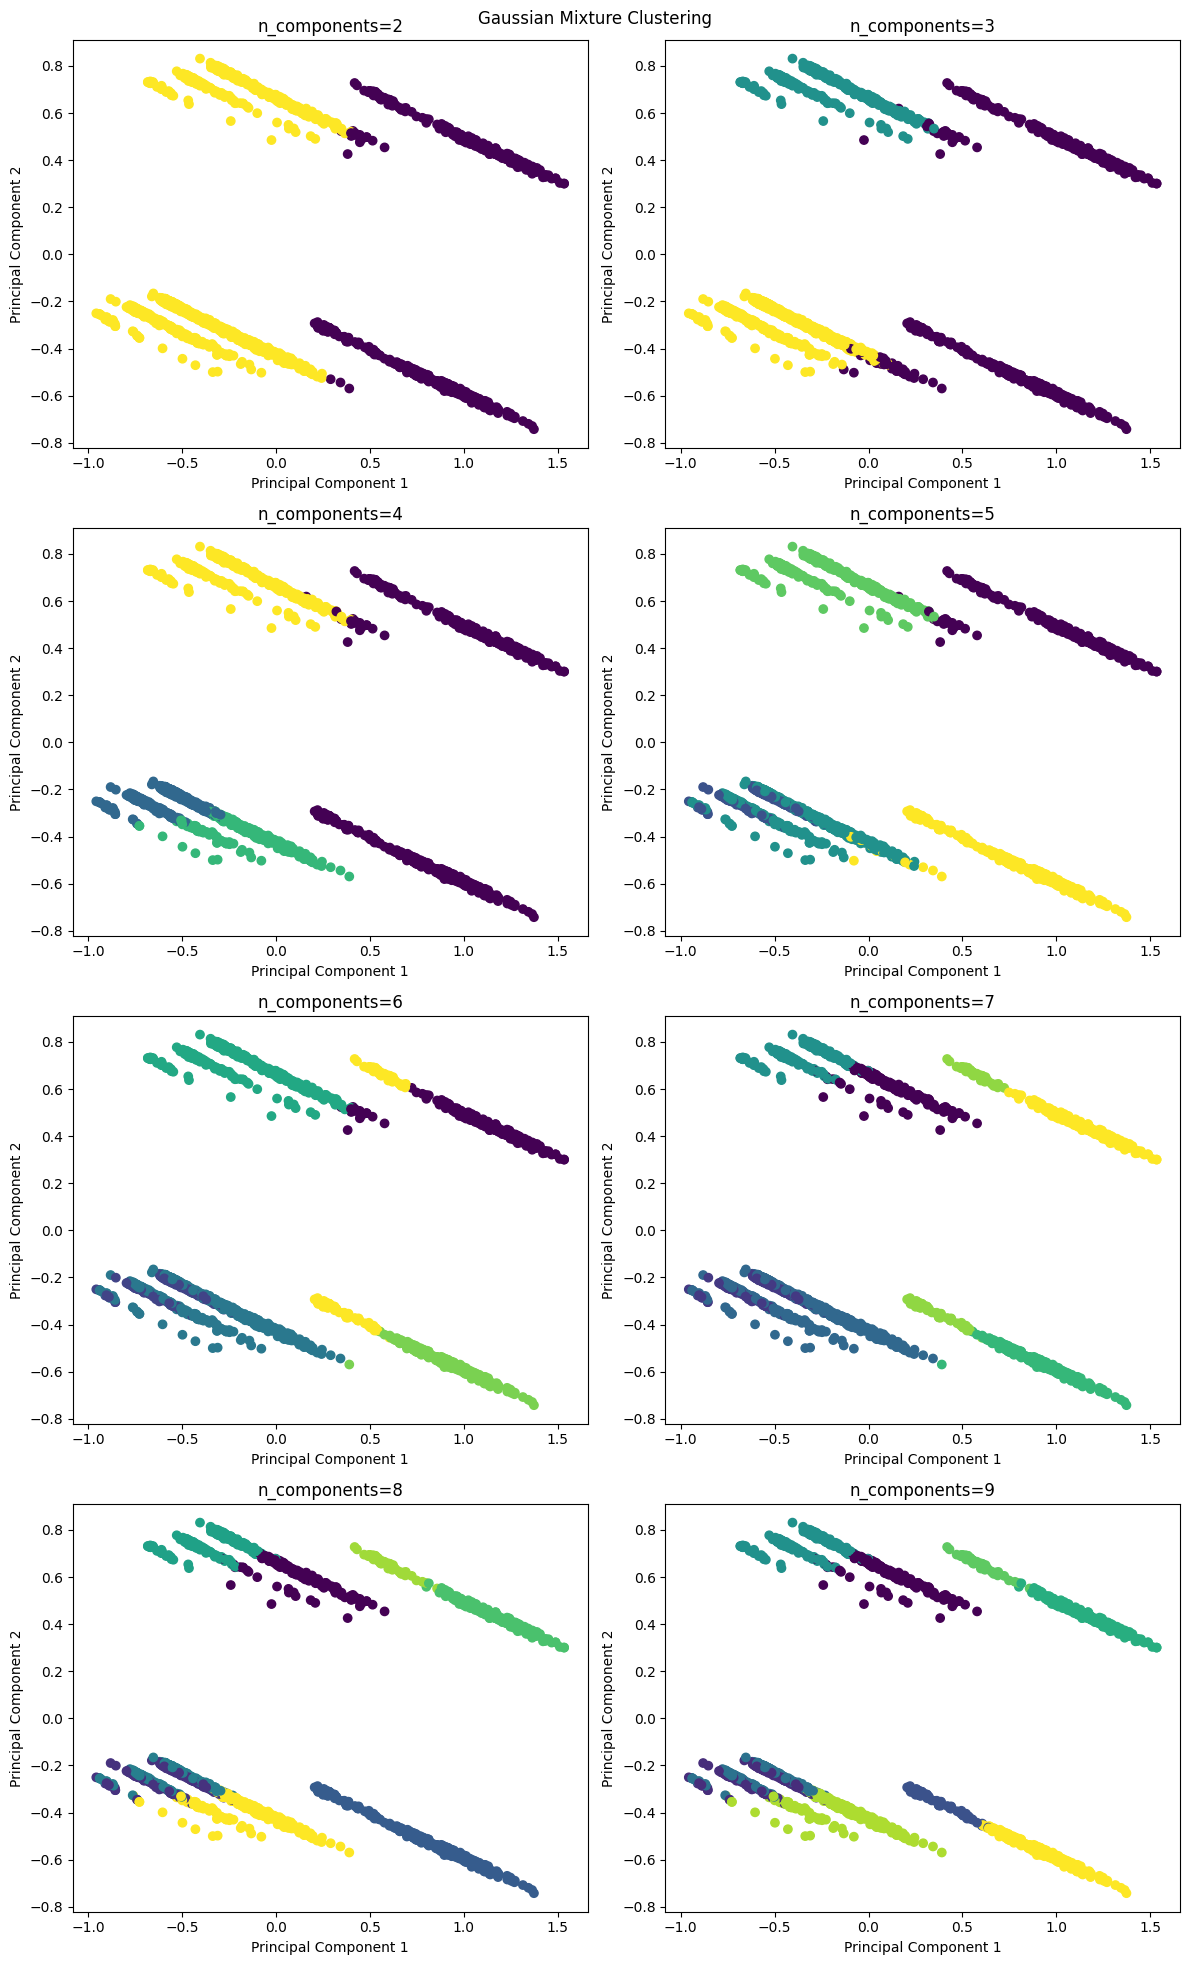

In [8]:
n_components = [i for i in range(2, 10)]
silhouettes_spherical = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='spherical', random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_spherical.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [9]:
silhouettes_spherical

[0.3086597212855029,
 0.25812951202465717,
 0.21065307775169187,
 0.19922521738541135,
 0.19841275683923348,
 0.18390009089308978,
 0.19709838452699865,
 0.2007800371449161]

Text(0, 0.5, 'Silhouette score')

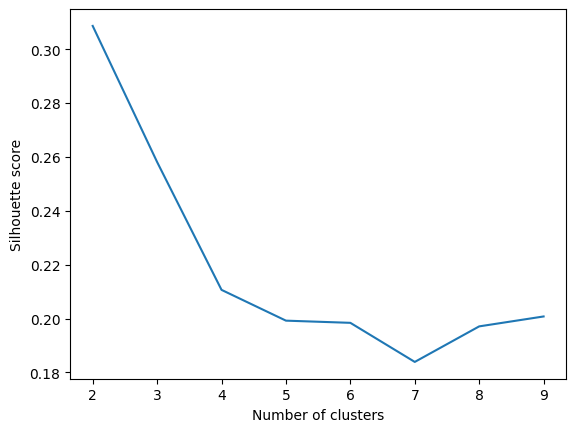

In [10]:
plt.plot(n_components, silhouettes_spherical)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

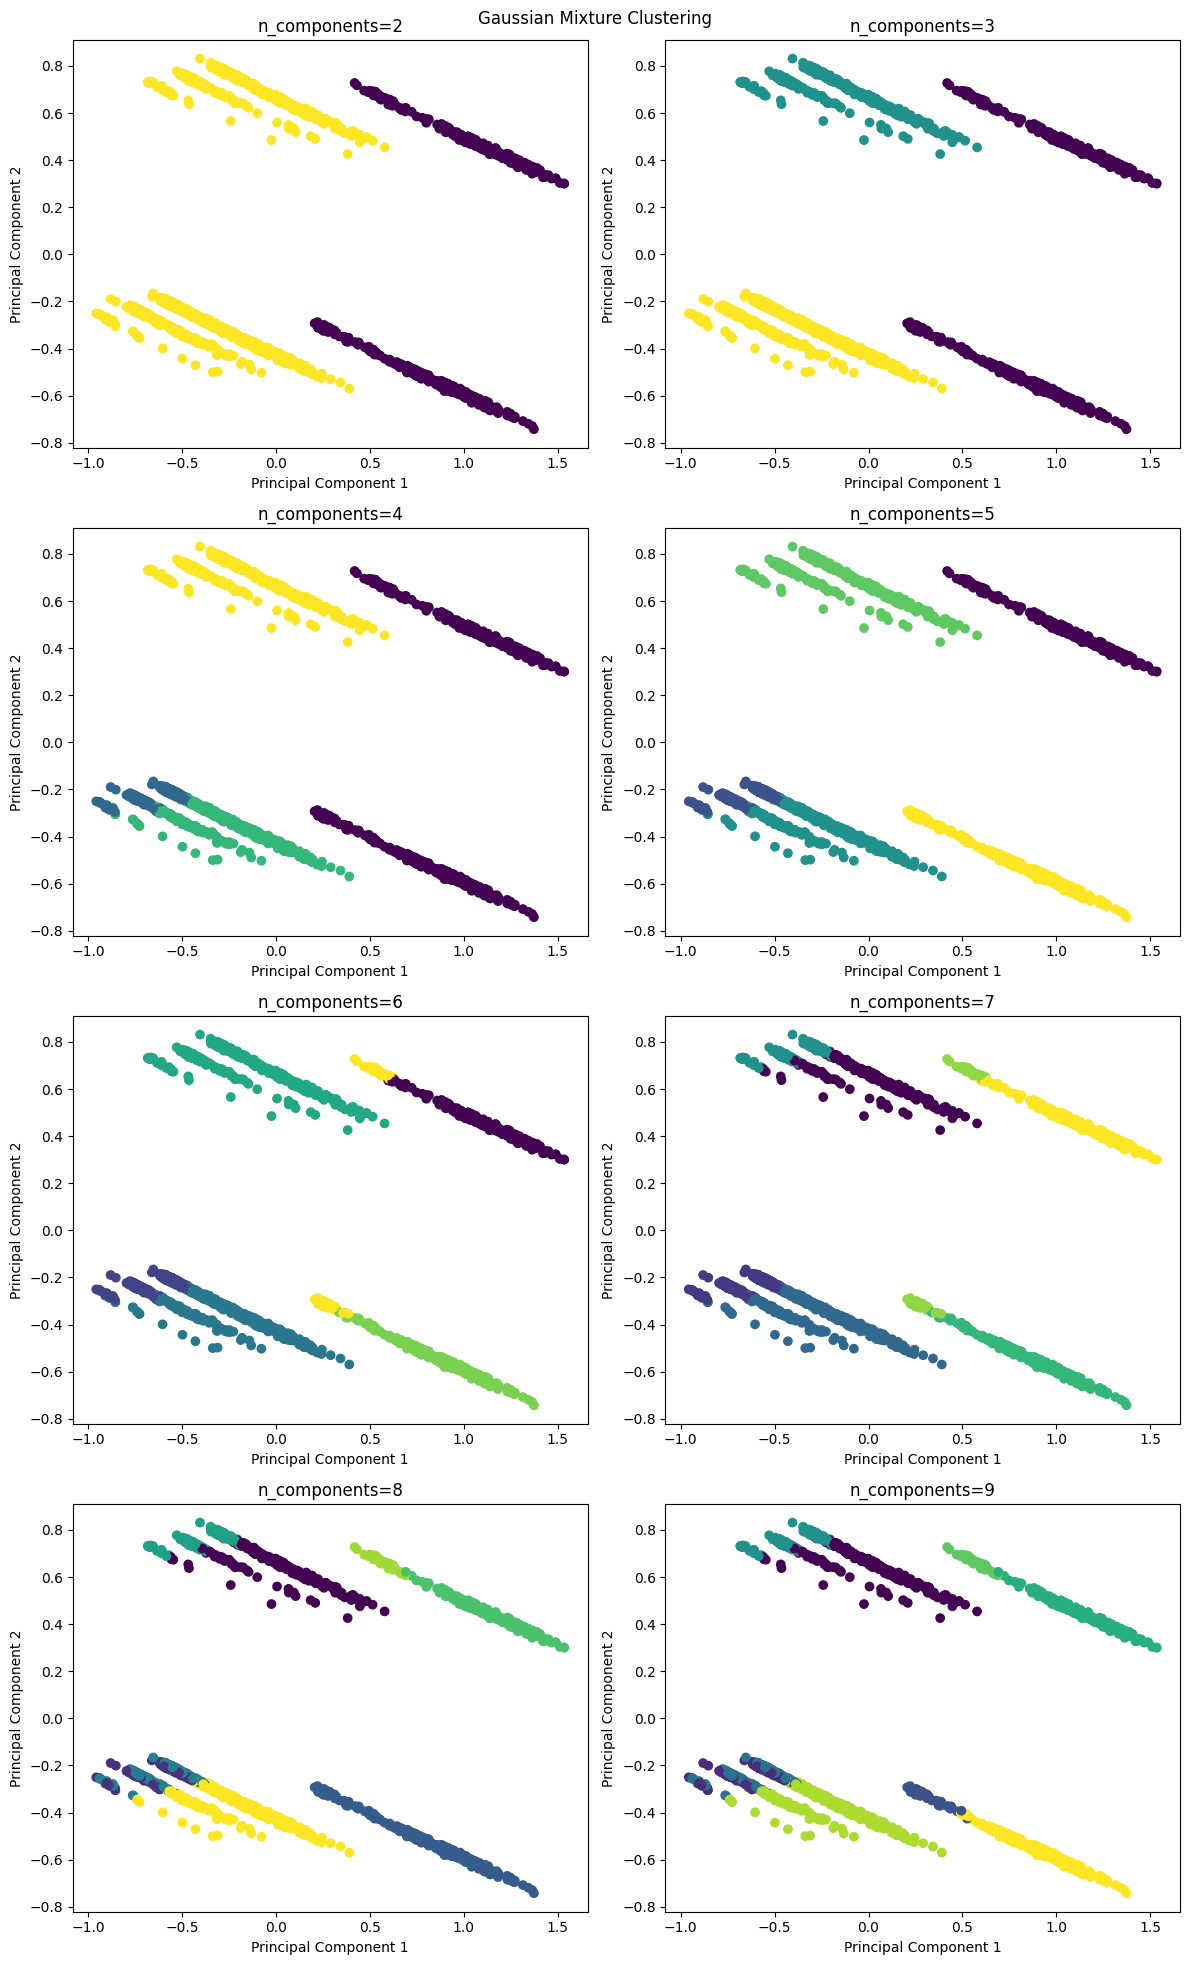

In [11]:
silhouettes_diag = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='diag', random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_diag.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [12]:
silhouettes_diag

[0.31097629894827766,
 0.27511768840776096,
 0.18323133962238125,
 0.2063169889822135,
 0.2042042254880559,
 0.1736821155342795,
 0.16511628397139988,
 0.16802338302145453]

Text(0, 0.5, 'Silhouette score')

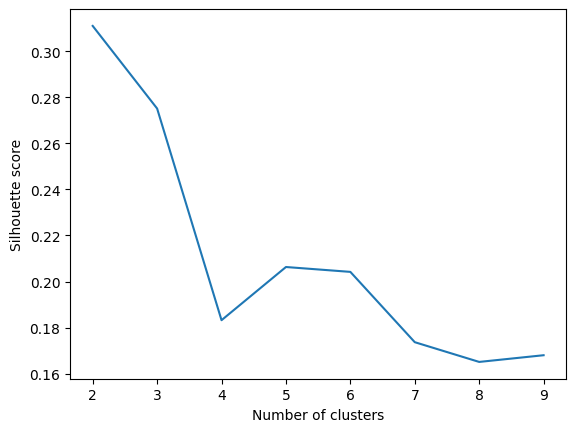

In [13]:
plt.plot(n_components, silhouettes_diag)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

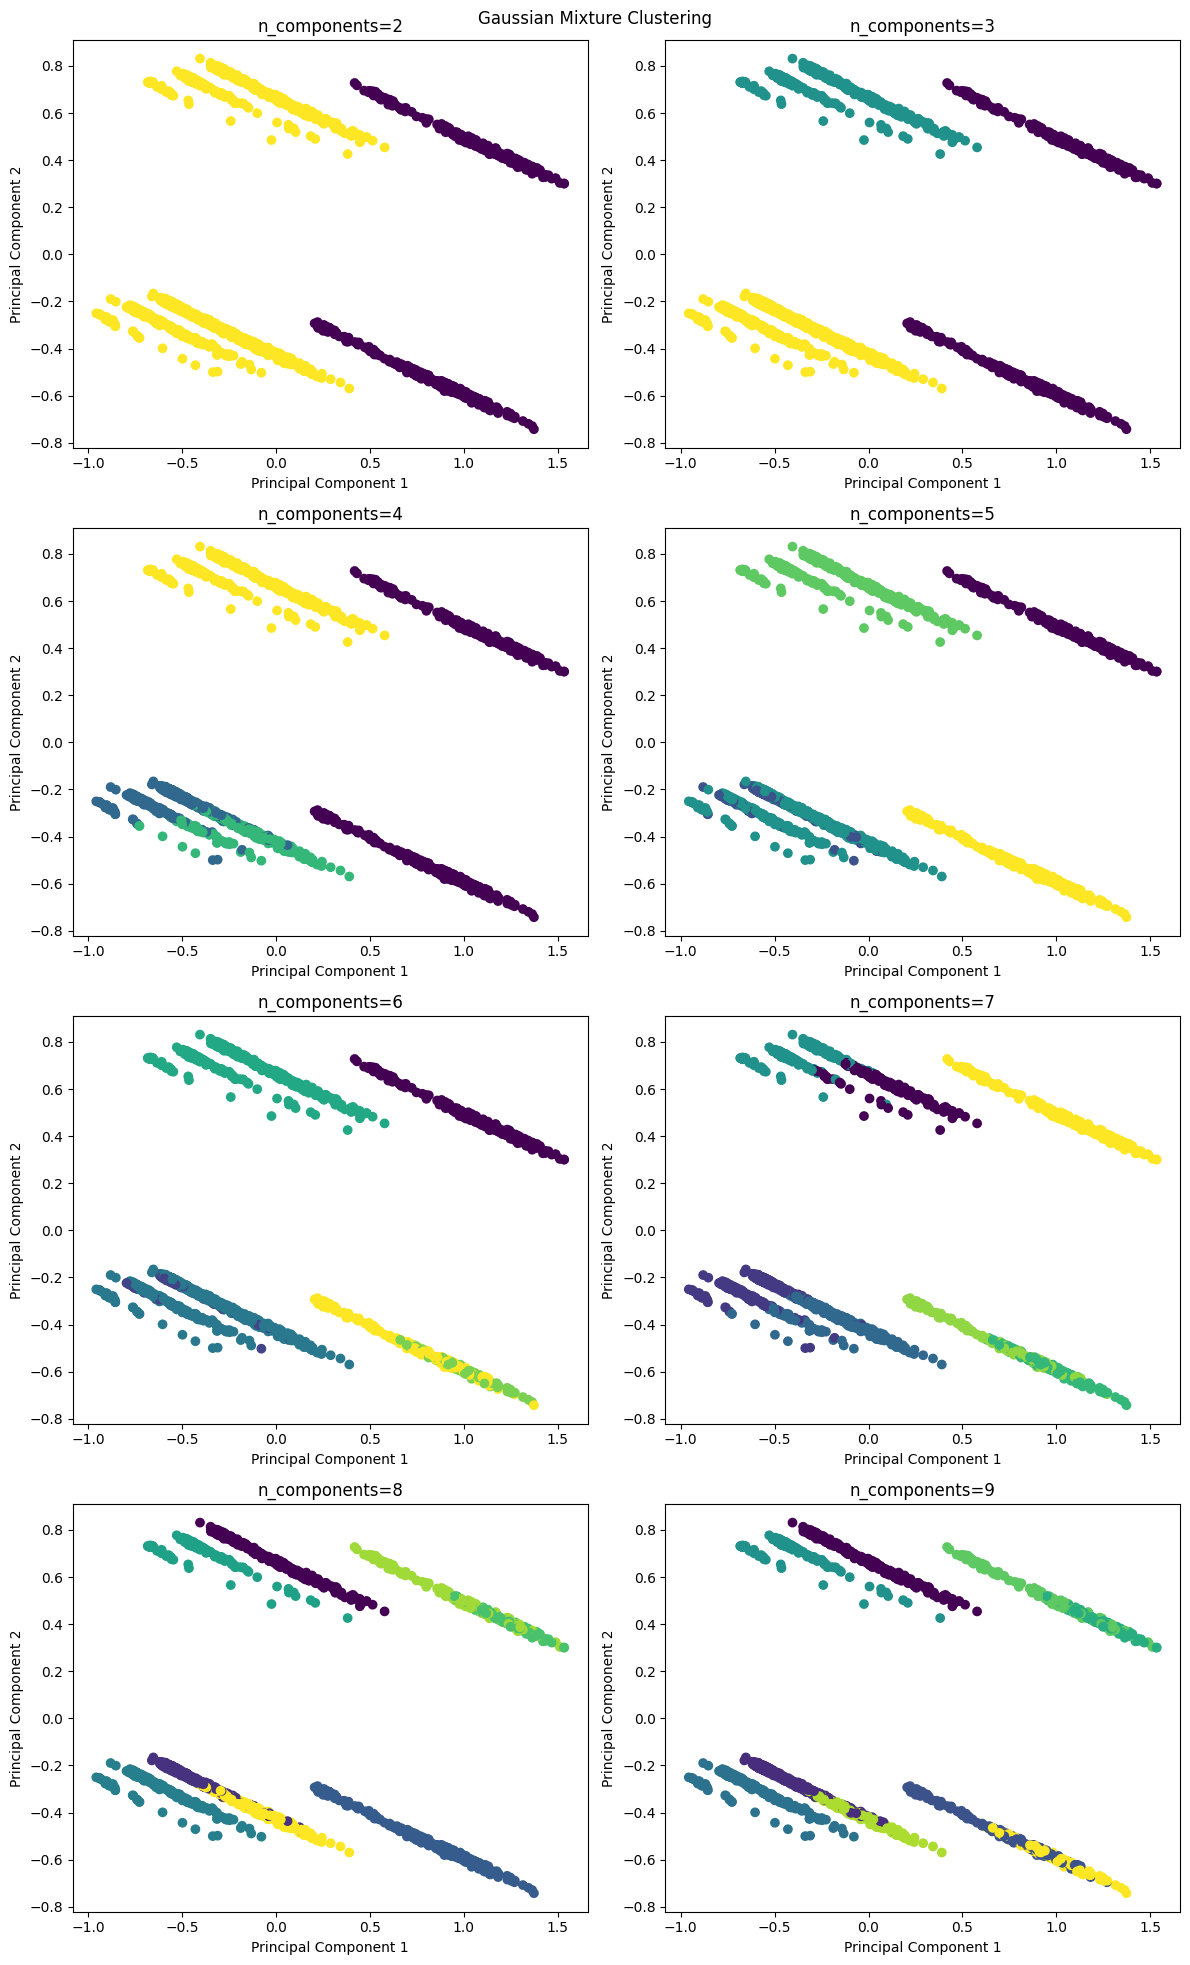

In [14]:
silhouettes_tied = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='tied', random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_tied.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [15]:
silhouettes_tied

[0.31097629894827766,
 0.27511768840776096,
 0.19950564083859373,
 0.19951257794057847,
 0.18507872998852617,
 0.17896504185287798,
 0.133038977653728,
 0.1109511798163307]

Text(0, 0.5, 'Silhouette score')

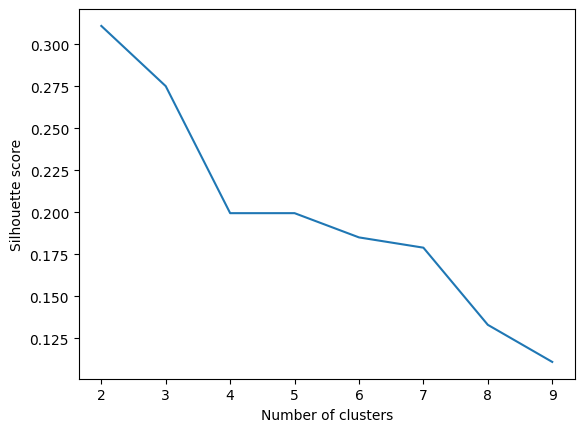

In [16]:
plt.plot(n_components, silhouettes_tied)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

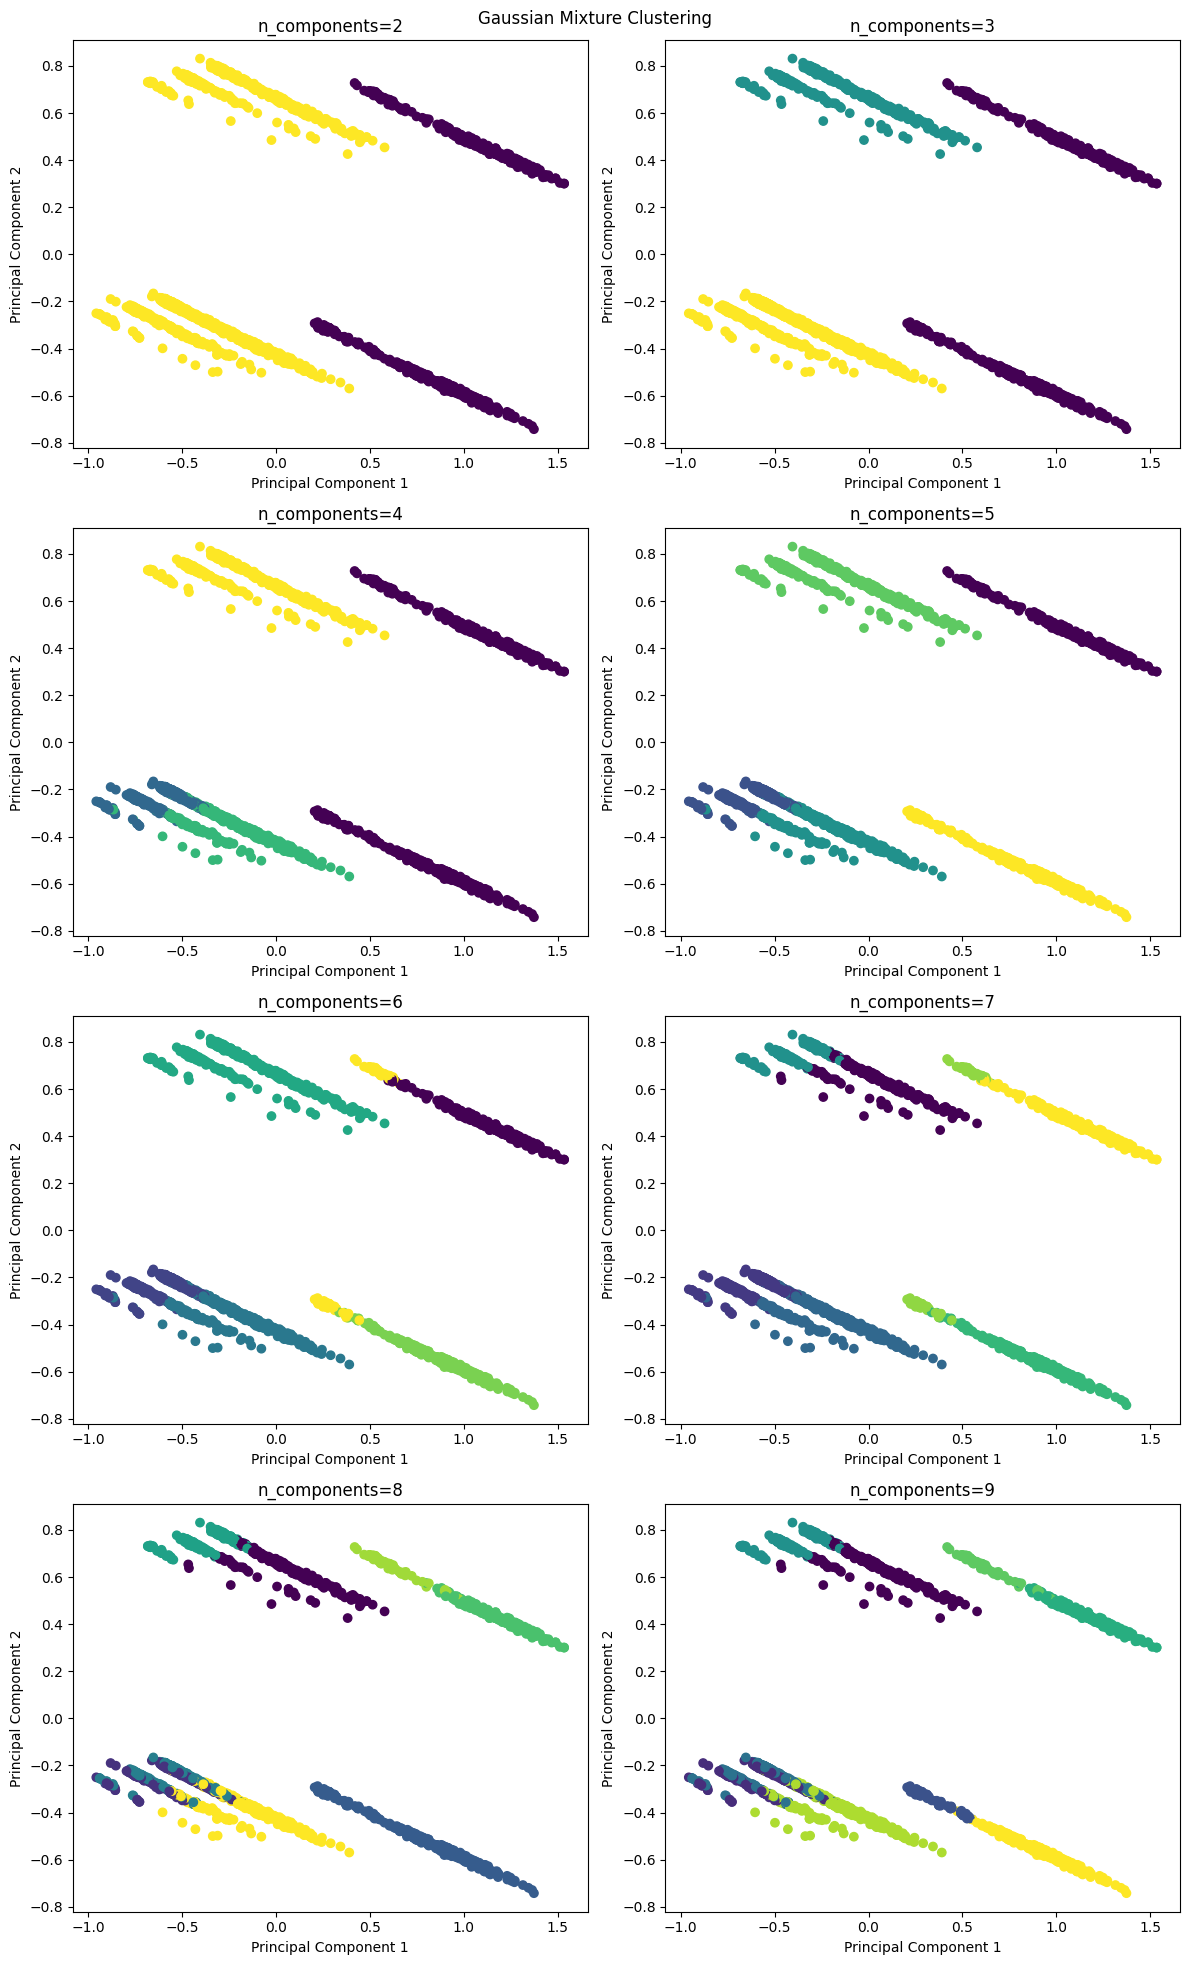

In [17]:
silhouettes_full = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("Gaussian Mixture Clustering")

for n, ax in zip(n_components, axs.flatten()):
    gauss = GaussianMixture(n_components=n, covariance_type='full', random_state=55)
    gauss.fit(X)
    labels = gauss.predict(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f"n_components={n}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    silhouettes_full.append(silhouette_score(X, labels))

plt.tight_layout()
plt.show()

In [18]:
silhouettes_full

[0.31097629894827766,
 0.27511768840776096,
 0.191303849374589,
 0.21570020343342536,
 0.21462150309539751,
 0.18850528774567193,
 0.17432334844601108,
 0.1776312628187724]

Text(0, 0.5, 'Silhouette score')

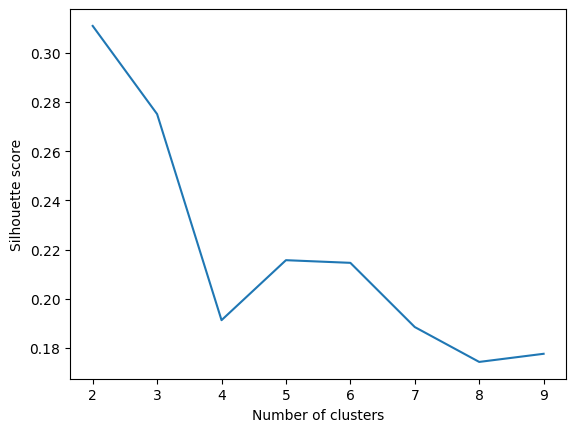

In [19]:
plt.plot(n_components, silhouettes_full)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

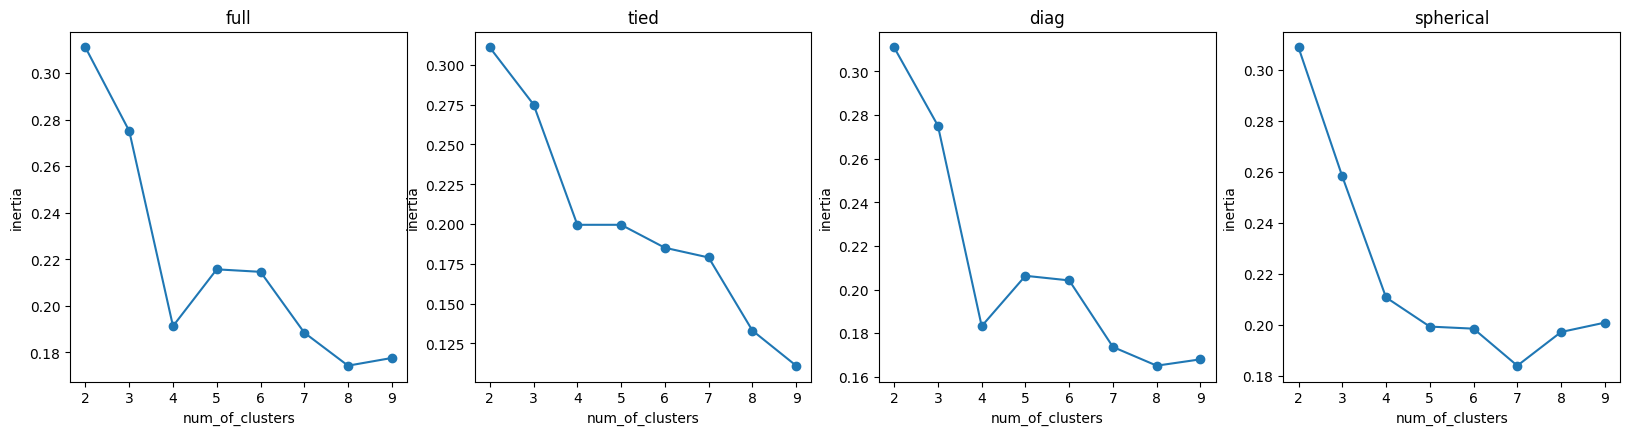

In [20]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.plot(n_components, silhouettes_full, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('full')

plt.subplot(2, 4, 2)
plt.plot(n_components, silhouettes_tied, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('tied')

plt.subplot(2, 4, 3)
plt.plot(n_components, silhouettes_diag, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('diag')

plt.subplot(2, 4, 4)
plt.plot(n_components, silhouettes_spherical, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('spherical')

plt.show()

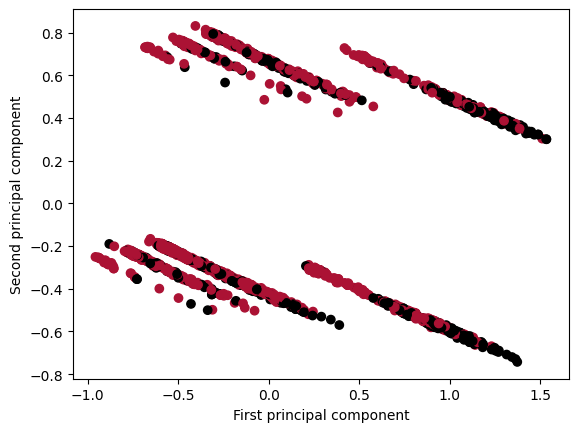

In [21]:
color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in y]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

In [22]:
def clustering_score(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

In [23]:
gauss_tied = GaussianMixture(n_components=2, covariance_type='tied', random_state=55)
gauss_tied.fit(X)
labels_tied = gauss_tied.predict(X)

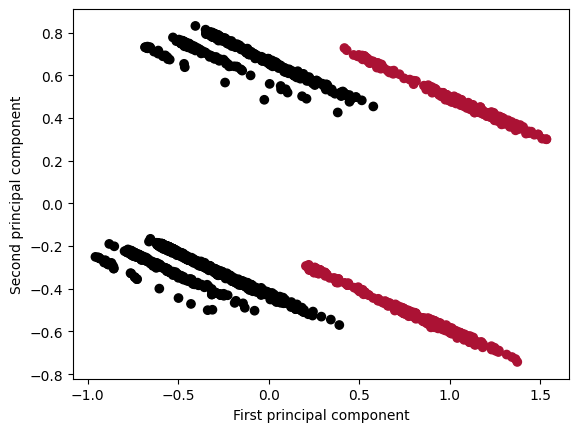

In [24]:
color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in labels_tied]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

In [25]:
tied_score=clustering_score(y, labels_tied)
tied_score

30.19291161956034

In [26]:
gauss_full = GaussianMixture(n_components=2, covariance_type='full', random_state=55)
gauss_full.fit(X)
labels_full = gauss_full.predict(X)

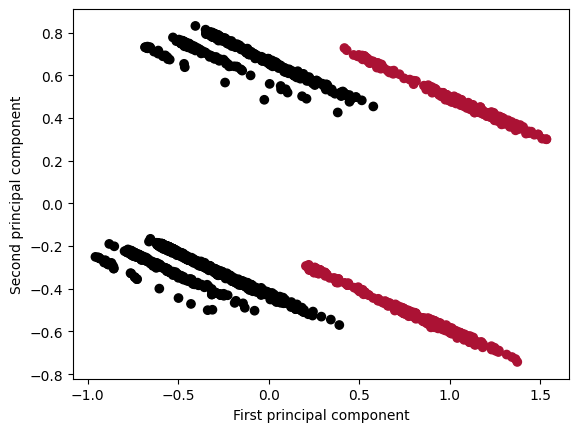

In [27]:
color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in labels_full]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

In [28]:
full_score=clustering_score(y, labels_full)
full_score

30.19291161956034

In [29]:
gauss_diag = GaussianMixture(n_components=2, covariance_type='diag', random_state=55)
gauss_diag.fit(X)
labels_diag = gauss_diag.predict(X)

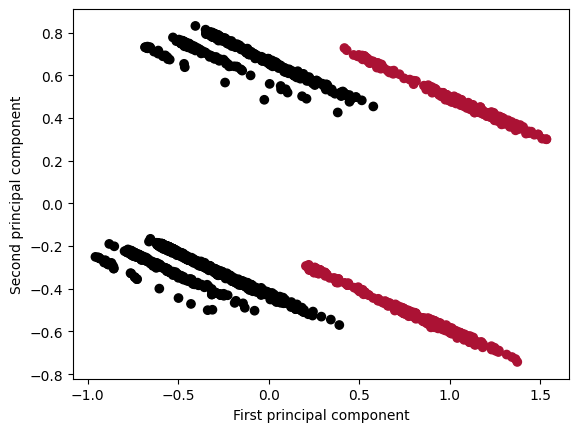

In [30]:
color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in labels_diag]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

In [31]:
diag_score=clustering_score(y, labels_diag)
diag_score

30.19291161956034

In [32]:
gauss_spherical = GaussianMixture(n_components=2, covariance_type='spherical', random_state=55)
gauss_spherical.fit(X)
labels_spherical = gauss_spherical.predict(X)

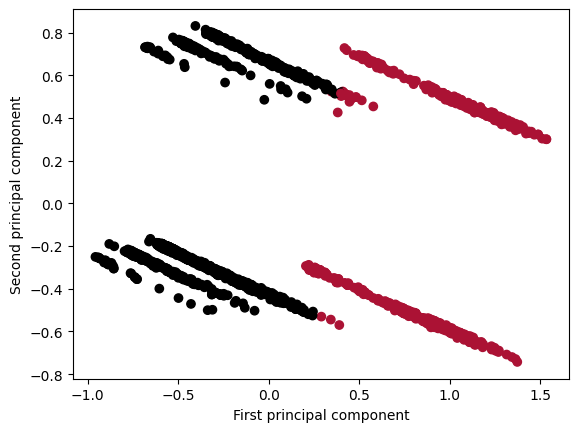

In [33]:
color_mapping = {0: '#ab1234', 1: '#000000'}
colors = [color_mapping[num] for num in labels_spherical]

plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()

In [34]:
spherical_score=clustering_score(y, labels_spherical)
spherical_score

30.41722745625841

In [35]:
final_score=[]
final_score.append(full_score)
final_score.append(tied_score)
final_score.append(diag_score)
final_score.append(spherical_score)

In [36]:
final_score

[30.19291161956034, 30.19291161956034, 30.19291161956034, 30.41722745625841]

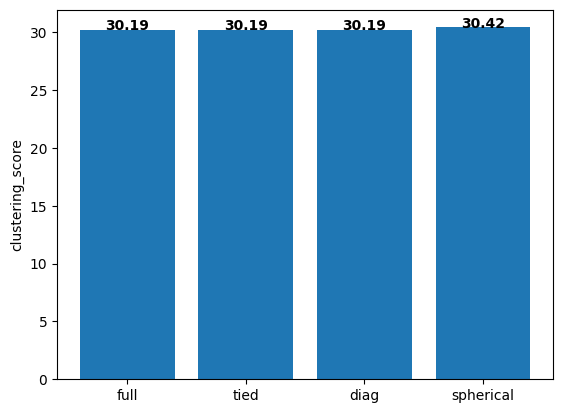

In [37]:
plt.bar(covariances,final_score)
plt.ylabel("clustering_score");
for i, v in enumerate(final_score):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', color='black', fontweight='bold')
plt.show()

In [38]:
clustering_score(labels_diag, labels_full)

100.0

In [39]:
clustering_score(labels_diag, labels_diag)

100.0

In [41]:
clustering_score(labels_spherical,labels_diag)

99.0578734858681